<a href="https://colab.research.google.com/github/Rudrajit12/EDA_Projects/blob/main/EDA_on_IMDB_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<u>Exploratory Data Analysis on IMDB Dataset</u>**

#### The IMDB dataset contains a list of 3000 movies and its corresponding details. The data needs to be explored and few questions are to be answered like:

* Which movie made the highest profit? Who were its actors?
* Unique genres of the movies dataset.
* Which actor has acted in the most movies etc?


In [2]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# reading the dataset
imdb_df = pd.read_csv('/content/drive/My Drive/AlmaBetter Data Science/Module 1/Data Wrangling/imdb_data.csv')
imdb_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


### **1. Do a basic inspection of the dataset**

In [5]:
imdb_df.shape

(3000, 23)

In [6]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

There are many missing values in few of the columns. We will see ahead what treatment needs to be done for these values if at all.

In [7]:
imdb_df.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


* The minimum runtime and budget looks a bit absurd here as min runtime being zero means that there is nothing in the movie which cannot be true.

* The budget too cannot be zero as we all know a movie cannot be made at a zero cost.

### **2. Do some basic cleaning of the dataset and replace the zero values wherever necessary**

In [8]:
# drop the rows where min runtime is zero
imdb_df.drop(imdb_df[imdb_df.runtime == 0].index, inplace=True)
imdb_df.head(3)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000


In [9]:
imdb_df.describe()

,id,budget,popularity,runtime,revenue
count,2988.000000,2.988000e+03,2988.000000,2986.000000,2.988000e+03
mean,1499.662985,2.261089e+07,8.491296,108.290020,6.693845e+07
std,866.148309,3.707838e+07,12.119830,21.043234,1.377606e+08
min,1.000000,0.000000e+00,0.000001,11.000000,1.000000e+00
25%,749.750000,0.000000e+00,4.086998,94.000000,2.401550e+06
50%,1499.500000,8.000000e+06,7.404582,104.000000,1.692863e+07
75%,2249.250000,3.000000e+07,10.900796,118.000000,6.911858e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [10]:
# replace the budget and revenue less than 2500 with mean of the budgets and revenues above 2500
imdb_df.loc[imdb_df['budget'] < 2500, 'budget'] = imdb_df.loc[imdb_df['budget'] >= 2500]['budget'].mean()
imdb_df.loc[imdb_df['revenue'] < 2500, 'revenue'] = imdb_df.loc[imdb_df['revenue'] >= 2500]['budget'].mean()

# create a profit column
imdb_df['profit'] = imdb_df['revenue'] - imdb_df['budget']
imdb_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,profit
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",1.400000e+07,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651.0,-1.685349e+06
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",4.000000e+07,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435.0,5.514944e+07
2,3,NaN,3.300000e+06,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000.0,9.792000e+06
3,4,NaN,1.200000e+06,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000.0,1.480000e+07
4,5,NaN,3.122058e+07,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970.0,-2.729661e+07


In [11]:
imdb_df.describe()

,id,budget,popularity,runtime,revenue,profit
count,2988.000000,2.988000e+03,2988.000000,2986.000000,2.988000e+03,2.988000e+03
mean,1499.662985,3.122058e+07,8.491296,108.290020,6.756716e+07,3.634658e+07
std,866.148309,3.435213e+07,12.119830,21.043234,1.375248e+08,1.155543e+08
min,1.000000,2.500000e+03,0.000001,11.000000,2.970000e+03,-1.074474e+08
25%,749.750000,1.000000e+07,4.086998,94.000000,3.015588e+06,-1.580216e+07
50%,1499.500000,3.122058e+07,7.404582,104.000000,1.861276e+07,1.419870e+06
75%,2249.250000,3.122058e+07,10.900796,118.000000,6.911858e+07,3.749067e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09,1.316249e+09


### **3. Which actor has acted in the most number of movies? Deep dive into the movies, genres and profits corresponding to this actor.**

In [12]:
# get the actor names and genre names out of the cast and genres list of dictionaries
import ast
imdb_df['new_cast'] = imdb_df.cast.fillna('[]').apply(ast.literal_eval)
imdb_df['new_genre'] = imdb_df.genres.fillna('[]').apply(ast.literal_eval)

# iterate over the list of dicts and get the names out
imdb_df['new_cast'] = imdb_df.new_cast.apply(lambda x: [i['name'] for i in x] if isinstance(x,list) else [])
imdb_df['new_genre'] = imdb_df.new_genre.apply(lambda x: [i['name'] for i in x] if isinstance(x,list) else [])
imdb_df.head(3)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,status,tagline,title,Keywords,cast,crew,revenue,profit,new_cast,new_genre
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651.0,-1685349.0,"[Rob Corddry, Craig Robinson, Clark Duke, Adam...",[Comedy]
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435.0,55149435.0,"[Anne Hathaway, Julie Andrews, H√©ctor Elizond...","[Comedy, Drama, Family, Romance]"
2,3,NaN,3300000.0,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000.0,9792000.0,"[Miles Teller, J.K. Simmons, Melissa Benoist, ...",[Drama]


          Actor Name  Number of Movies
0     Robert De Niro                30
1  Samuel L. Jackson                30
2     Morgan Freeman                27
3       Bruce Willis                25
4       J.K. Simmons                25


Text(0, 0.5, 'Actor Names')

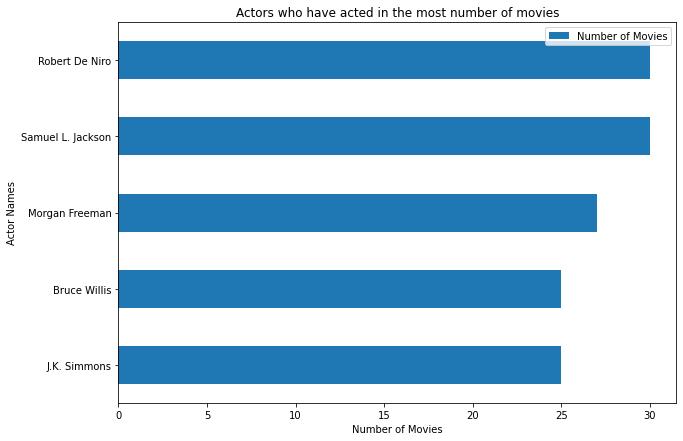

In [13]:
# explode the list of new_cast into individual elements
cast_df = imdb_df.explode('new_cast')
top_actors = pd.DataFrame(cast_df['new_cast'].value_counts()).reset_index()[:5]
top_actors.columns = ['Actor Name', 'Number of Movies']
print(top_actors)

# plot the actors who have acted in the most number of movies
top_actors.plot(x='Actor Name', y='Number of Movies', kind='barh', figsize=(10,7)).invert_yaxis()
plt.title('Actors who have acted in the most number of movies')
plt.xlabel('Number of Movies')
plt.ylabel('Actor Names')

* Robert De Niro and Samuel L Jackson has acted in the most number of movies (30).

                new_cast                                          new_genre  \
30850     Robert De Niro  [Drama, Comedy, Drama, Comedy, Crime, Romance,...   
32243  Samuel L. Jackson  [Action, Adventure, Crime, Thriller, Crime, Dr...   

         avg_profit  
30850  2.379964e+07  
32243  2.223503e+08  


Text(0, 0.5, 'Actor Names')

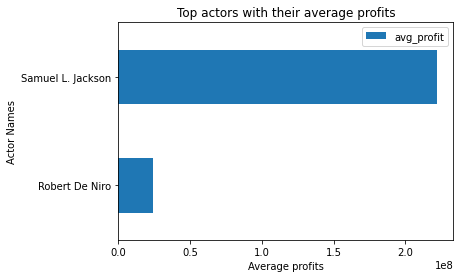

In [14]:
# find out the genres and profits of the movies where these actors have acted
grouped_actors = cast_df.groupby('new_cast').agg({'new_genre':'sum', 'profit':'mean'}).reset_index()
group_df = grouped_actors.loc[(grouped_actors['new_cast'] == 'Robert De Niro') | (grouped_actors['new_cast'] == 'Samuel L. Jackson')].rename({'profit':'avg_profit'}, axis=1)
print(group_df)

# plotting their average profits
group_df.plot(x='new_cast', y='avg_profit', kind='barh')
plt.title('Top actors with their average profits')
plt.xlabel('Average profits')
plt.ylabel('Actor Names')

* Samuel L Jackson in average generates more average profit in the films he acts than Robert De Niro.

### **4. Which movie made the highest profit? Who were its producer and director? Identify the actors in that film.**

In [15]:
# movie with the highest profit
highest_profit = imdb_df[imdb_df['profit'] == imdb_df['profit'].max()]
highest_profit['original_title']

1761    Furious 7
Name: original_title, dtype: object

In [16]:
# producers and directors of the movie with highest profit
max_ind = list(highest_profit.index)[0]
full_crew = eval(imdb_df.loc[max_ind, 'crew'])

producers = []
directors = []

for crew in full_crew:
  if crew['job'] == 'Producer':
    producers.append(crew['name'])
  elif crew['job'] == 'Director':
    directors.append(crew['name'])

print(f'Producers: {producers}')
print(f'Directors: {directors}')

Producers: ['Vin Diesel', 'Neal H. Moritz', 'Michael Fottrell', 'Brandon Birtell']
Directors: ['James Wan']


In [17]:
# actors of the movie with the highest profit
full_cast = eval(imdb_df.loc[max_ind, 'cast'])

actors = []

for cast in full_cast:
  actors.append(cast['name'])

print(f'Actors: {actors}')

Actors: ['Vin Diesel', 'Paul Walker', 'Dwayne Johnson', 'Michelle Rodriguez', 'Tyrese Gibson', 'Ludacris', 'Jordana Brewster', 'Djimon Hounsou', 'Tony Jaa', 'Ronda Rousey', 'Nathalie Emmanuel', 'Kurt Russell', 'Jason Statham', 'Sung Kang', 'Gal Gadot', 'Lucas Black', 'Elsa Pataky', 'Noel Gugliemi', 'John Brotherton', 'Luke Evans', 'Ali Fazal', 'Miller Kimsey', 'Charlie Kimsey', 'Eden Estrella', 'Gentry White', 'Iggy Azalea', 'Jon Lee Brody', 'Levy Tran', 'Anna Colwell', 'Viktor Hernandez', 'Steve Coulter', 'Robert Pralgo', 'Antwan Mills', 'J.J. Phillips', 'Jorge Ferragut', 'Sara Sohn', 'Benjamin Blankenship', 'D.J. Hapa', 'T-Pain', 'Brian Mahoney', 'Brittney Alger', 'Romeo Santos', 'Jocelin Donahue', 'Stephanie Langston', 'Jorge-Luis Pallo', 'Tego Calder√≥n', 'Nathalie Kelley', 'Shad Moss', 'Don Omar', 'Klement Tinaj', 'Caleb Walker', 'Cody Walker']


### **5. Who are the top 3 directors in terms of average profits and they prefer which actors the most?**

In [18]:
# find the directors out
def find_directors(lst):
  index = 0

  if type(lst) != float:
    lst = ast.literal_eval(lst)

    while True:
      if lst[index]['job'] != 'Director':
        index += 1
      else:
        return lst[index]['name']

  director_name        profit
0   Joss Whedon  1.212481e+09
1  Byron Howard  8.737842e+08
2  Roger Allers  7.432418e+08


Text(0, 0.5, 'Directors')

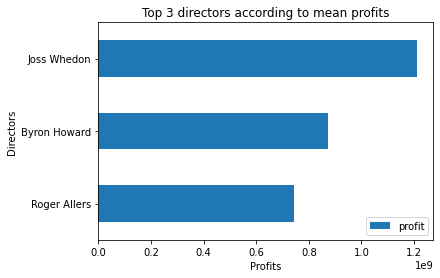

In [19]:
# print the top 3 directors out
imdb_df['director_name'] = imdb_df.apply(lambda x: find_directors(x['crew']), axis=1)
top_directors = imdb_df.groupby('director_name')['profit'].mean().sort_values(ascending=False).reset_index()[:3]
print(top_directors)

# plot the top 3 directors
top_directors.plot(x='director_name', y='profit', kind='barh').invert_yaxis()
plt.title('Top 3 directors according to mean profits')
plt.xlabel('Profits')
plt.ylabel('Directors')

* Joss Whedon has earned the most profits from his films.

In [20]:
# which actors do they prefer
prefer_actors_1 = list(imdb_df[imdb_df['director_name'] == top_directors['director_name'][0]]['new_cast'])[0]
print(f"{top_directors['director_name'][0]} prefers these actors the most: {prefer_actors_1} \n")

prefer_actors_2 = list(imdb_df[imdb_df['director_name'] == top_directors['director_name'][1]]['new_cast'])[0]
print(f"{top_directors['director_name'][1]} prefers these actors the most: {prefer_actors_2} \n")

prefer_actors_3 = list(imdb_df[imdb_df['director_name'] == top_directors['director_name'][2]]['new_cast'])[0]
print(f"{top_directors['director_name'][2]} prefers these actors the most: {prefer_actors_3}")

Joss Whedon prefers these actors the most: ['Robert Downey Jr.', 'Chris Evans', 'Mark Ruffalo', 'Chris Hemsworth', 'Scarlett Johansson', 'Jeremy Renner', 'Tom Hiddleston', 'Clark Gregg', 'Cobie Smulders', 'Stellan Skarsg√•rd', 'Samuel L. Jackson', 'Gwyneth Paltrow', 'Paul Bettany', 'Jenny Agutter', 'Walter Perez', 'Powers Boothe', 'Stan Lee', 'Arthur Darbinyan', 'Donald Li', 'Ashley Johnson', 'Harry Dean Stanton', 'Alicia Sixtos', 'Dieter Riesle', 'Jamie McShane', 'Jeff Wolfe', 'Jerzy Skolimowski', 'Maximiliano Hern√°ndez', 'Alexis Denisof', 'James Eckhouse', 'Enver Gjokaj', 'Damion Poitier', 'Tina Benko', 'Kirill Nikiforov', "M'laah Kaur Singh", 'Rashmi Rustagi', 'Warren Kole', 'Jesse Garcia', 'Kenneth Tigar', 'Josh Cowdery', 'Katsumi Komatsu', 'Yumiko Komatsu', 'Momoko Komatsu', 'Robert Clohessy', 'Fernanda Toker', 'Andrea Vecchio', 'Robin Swoboda', 'Brent McGee', 'Michael Zhang', 'William-Christopher Stephens', 'Kelley Robins', 'Romy Rosemont', 'Pat Kiernan', 'Thomas Roberts', 'Jill

### **6. This data has information about movies made in different languages. Which language has the highest average ROI (return on investment)?**

In [21]:
# calculate roi for each movie
imdb_df['roi'] = imdb_df['profit'] * 100/ imdb_df['budget']
imdb_df.head(3)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,title,Keywords,cast,crew,revenue,profit,new_cast,new_genre,director_name,roi
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651.0,-1685349.0,"[Rob Corddry, Craig Robinson, Clark Duke, Adam...",[Comedy],Steve Pink,-12.038207
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435.0,55149435.0,"[Anne Hathaway, Julie Andrews, H√©ctor Elizond...","[Comedy, Drama, Family, Romance]",Garry Marshall,137.873588
2,3,NaN,3300000.0,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000.0,9792000.0,"[Miles Teller, J.K. Simmons, Melissa Benoist, ...",[Drama],Damien Chazelle,296.727273


In [22]:
# language with highest average roi
language_roi = imdb_df[['original_language','roi']].groupby('original_language').mean().reset_index()
language_roi.loc[language_roi['roi'] == language_roi['roi'].max(), 'original_language']

18    ko
Name: original_language, dtype: object

### **7. Find out the unique genres of movies in the dataset.**

In [23]:
# select only non null values of genres
genre_df = imdb_df[~imdb_df['genres'].isna()]

# extract the names of the genres
final_genre = []
for index, row in genre_df.iterrows():
  genre_list = eval(row['genres'])
  for genre in genre_list:
    final_genre.append(genre['name'])

# convert list into set to get unique genres
print(pd.DataFrame(set(final_genre), columns=['Unique_Genres']))

      Unique_Genres
0           Mystery
1          TV Movie
2             Music
3   Science Fiction
4             Drama
5           Foreign
6           Romance
7             Crime
8            Family
9           History
10        Animation
11           Comedy
12              War
13          Western
14           Action
15        Adventure
16      Documentary
17         Thriller
18           Horror
19          Fantasy


* There are 19 unique genres present in the IMDB dataset.

### **8. Make a table of all the producers and directors of each movie. Find the top 3 producers who have produced movies with the highest average RoI?**

In [24]:
# select the non null values only
crew_df = imdb_df[~imdb_df['crew'].isna()]

# empty lists to store the producers and directors
producers = []
directors = []

# iterate over each movie
for index, row in crew_df.iterrows():
  full_crew = eval(row['crew'])

  # iterate over each crew member
  for crew in full_crew:
    if crew['job'] == 'Producer':
      producers.append([row['original_title'], crew['name'], row['roi']])
    elif crew['job'] == 'Director':
      directors.append([row['original_title'], crew['name'], row['roi']])

producers_df = pd.DataFrame(producers, columns=['Movie Title','Producer Name','ROI'])
directors_df = pd.DataFrame(directors, columns=['Movie Title','Director Name','ROI'])

In [25]:
# display the producers table
producers_df

,Movie Title,Producer Name,ROI
0,Hot Tub Time Machine 2,Andrew Panay,-12.038207
1,The Princess Diaries 2: Royal Engagement,Whitney Houston,137.873588
2,The Princess Diaries 2: Royal Engagement,Mario Iscovich,137.873588
3,The Princess Diaries 2: Royal Engagement,Debra Martin Chase,137.873588
4,Whiplash,David Lancaster,296.727273
...,...,...,...
5993,Abduction,Doug Davison,134.534729
5994,Abduction,Roy Lee,134.534729
5995,Abduction,Ellen Goldsmith-Vein,134.534729
5996,Abduction,Dan Lautner,134.534729


In [26]:
# display the directors table
directors_df

,Movie Title,Director Name,ROI
0,Hot Tub Time Machine 2,Steve Pink,-12.038207
1,The Princess Diaries 2: Royal Engagement,Garry Marshall,137.873588
2,Whiplash,Damien Chazelle,296.727273
3,Kahaani,Sujoy Ghosh,1233.333333
4,마린보이,Jong-seok Yoon,-87.431462
...,...,...,...
3208,Chasers,Dennis Hopper,-94.885786
3209,Vi är bäst!,Lukas Moodysson,-99.421567
3210,The Long Kiss Goodnight,Renny Harlin,37.625786
3211,Along Came Polly,John Hamburg,309.436633


     Producer Name           ROI
143     Amir Zbeda  1.288939e+06
2868   Robin Cowie  4.132333e+05
1181    Gregg Hale  4.132333e+05


Text(0, 0.5, 'Producer Name')

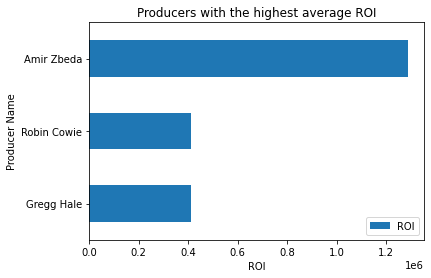

In [27]:
# find the top 3 producers with the highest average roi
producer_avg_roi = producers_df[['Producer Name','ROI']].groupby('Producer Name').mean().reset_index().sort_values(by='ROI', ascending=False)[:3]
print(producer_avg_roi)

# plot the top 3 producers
producer_avg_roi.plot(x='Producer Name', y='ROI', kind='barh').invert_yaxis()
plt.title('Producers with the highest average ROI')
plt.xlabel('ROI')
plt.ylabel('Producer Name')

       Director Name           ROI
1407       Oren Peli  1.288939e+06
389    Daniel Myrick  4.132333e+05
1418  Park Hoon-Jung  2.215690e+05


Text(0, 0.5, 'Director Name')

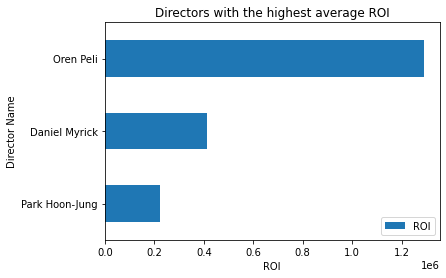

In [28]:
# find out the top 3 directors with the highest average ROI
director_avg_roi = directors_df[['Director Name','ROI']].groupby('Director Name').mean().reset_index().sort_values(by='ROI', ascending=False)[:3]
print(director_avg_roi)

# plot the top 3 directors
director_avg_roi.plot(x='Director Name', y='ROI', kind='barh').invert_yaxis()
plt.title('Directors with the highest average ROI')
plt.xlabel('ROI')
plt.ylabel('Director Name')

### **9. Find out the unique languages present in the dataset.**

Text(0, 0.5, 'Languages')

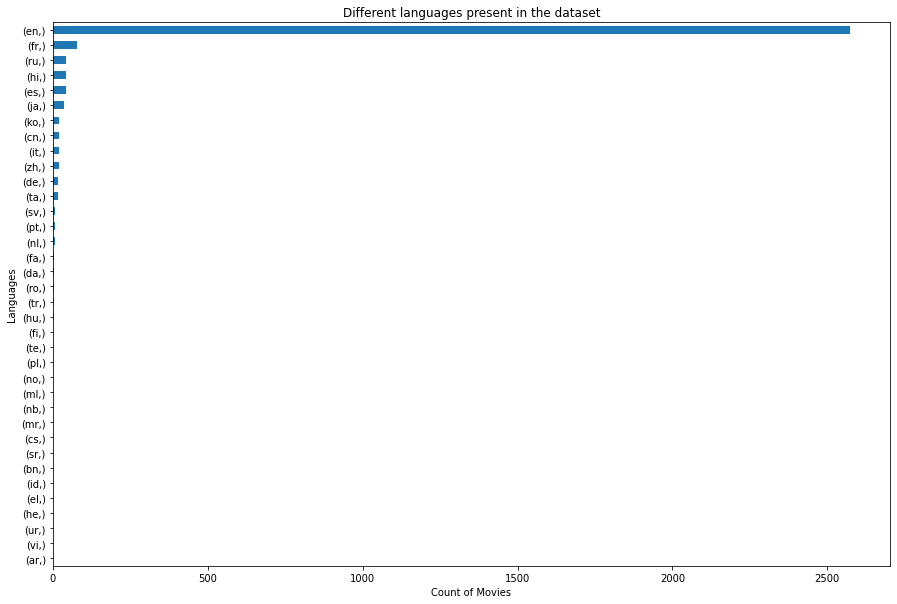

In [29]:
# find the unique languages present with its count
unique_lang = imdb_df[['original_language']].value_counts()

# plot the languages and its count
unique_lang.plot(kind='barh', figsize=(15,10)).invert_yaxis()
plt.title('Different languages present in the dataset')
plt.xlabel('Count of Movies')
plt.ylabel('Languages')

* Most of the movies in the dataset belongs to the english language followed by french and russian.

### **10. Find the top 3 movies produced according to popularity.**

In [30]:
# top 3 movies according to popularity
popular_movies = imdb_df[['original_title','popularity']].sort_values(by='popularity', ascending=False)[:3]
popular_movies

,original_title,popularity
518,Wonder Woman,294.337037
684,Beauty and the Beast,287.253654
1695,Baby Driver,228.032744


### **11. Which production companies produced the most number of movies?**

                                        Count
Warner Bros.                              202
Universal Pictures                        188
Paramount Pictures                        161
Twentieth Century Fox Film Corporation    138
Columbia Pictures                          91


Text(0, 0.5, 'Production Companies')

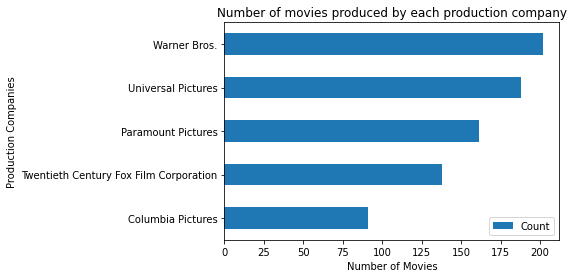

In [31]:
# select only the non null values
pc_df = imdb_df[~imdb_df['production_companies'].isna()]

# empty dict to store the names and their counts
count_pc = {}

# iterate over each record and get the name out
for index, row in pc_df.iterrows():
  full_pc = eval(row['production_companies'])

  for pc in full_pc:
    if pc['name'] in count_pc:
      count_pc[pc['name']] += 1
    else:
      count_pc[pc['name']] = 1

count_pc_df = pd.DataFrame.from_dict(count_pc, orient='index', columns=['Count']).sort_values(by='Count', ascending=False)[:5]
print(count_pc_df)

# plot the companies and its count
count_pc_df.plot(kind='barh').invert_yaxis()
plt.title('Number of movies produced by each production company')
plt.xlabel('Number of Movies')
plt.ylabel('Production Companies')